## Final Project Submission

Please fill out:
* **Student name**: Julius Kinyua
* **Student pace**: Full time
* **Scheduled project review date/time**: 22/03/2024
* **Instructor name**: Asha Deen
* **Blog post URL**: https://lyonec.com/


# Section 1: Business Understanding

Microsoft has started a new movie studio and intends to understand the best-performing movies. As a data scientist, my role is to perform in-depth analysis on existing movie data from various sources.

The sources of data being analyzed in this case include:
- IMDb data
- Movies data
- Movie reviews
- Movie budget
- Among others

After a thorough analysis of the existing data, this notebook includes recommendations on the best movies and movie genres that Microsoft Studio should focus on investing in.

# Section 2: Data Understanding

In [2]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

sns.set_theme(style="darkgrid")

In [8]:
# Unzip the zipped im.db using zipfile module
path = "zippedData/im.db.zip"

with ZipFile(path, 'r') as zipf:
    zipf.extractall('data')


In [10]:
# Create a connection to the Database:
conn = sqlite3.connect('data/im.db')

query = """
SELECT name
FROM sqlite_master
WHERE type = 'table'
""";

pd.read_sql(query, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


The line of code above use the query line above to check the table names in the im.db database contained in the
im.db databse that has been unzipped above.

### Tables To Use For Analysis

From the sqlite query results obtained above, and with regard to our main goals for data analysis, we can draw that the most important tables to use include:
- movie_basics
- movie_ratings

Now, let's go ahead and query the tables to see the first five and last rows of each table.

In [11]:
movie_basics_query = """
SELECT *
FROM movie_basics
"""

pd.read_sql(movie_basics_query, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [13]:
movie_ratings_query = """
SELECT *
FROM movie_ratings
"""

pd.read_sql(movie_ratings_query, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


From the two DataFrames obtained above, we can use the movie_id to check the movie basics and movie rating of individual films
using a one to one relationship

### Structure of the tables

Let's check the structure and descriptive statistics of each table so that we can understand the data type of each of the columns.

In [15]:
# This line ehecks the number of columns as well the datatype contained in movie_basics table

pd.read_sql("SELECT * FROM movie_basics", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [17]:
# Let's have a closer look at some descriptive statistics on movie_basics table

pd.read_sql("SELECT * FROM movie_basics", conn).describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [16]:
# This line ehecks the number of columns as well the datatype contained in movie_ratings table

pd.read_sql("SELECT * FROM movie_ratings", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [18]:
# Let's have a closer look at some descriptive statistics on movie_ratings table

pd.read_sql("SELECT * FROM movie_ratings", conn).describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


Next, we go ahead to check the size of each Dataframe

In [19]:
movie_basics_size = pd.read_sql("SELECT * FROM movie_basics;", conn).shape
movie_ratings_size = pd.read_sql("SELECT * FROM movie_ratings;", conn).shape

print(movie_basics_size)
print(movie_ratings_size)

(146144, 6)
(73856, 3)


By using the .shape attribute above, we can draw the following from the database:

In [20]:
print(f'Movie basics table contains {str(movie_basics_size[0])} rows and {str(movie_basics_size[1])} columns')
print(f'Movie ratings table contains {str(movie_ratings_size[0])} rows and {str(movie_ratings_size[1])} columns')

Movie basics table contains 146144 rows and 6 columns
Movie ratings table contains 73856 rows and 3 columns


Let's repeat the same process for the movie-gross csv

In [22]:
# This line reads all the data from the csv file named bom.movie_gross

bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [23]:
# Let's take a closer look at the structure of dataset

bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [24]:
# Again, we take a closer look at the descriptive statistics of the dataset contained in the csv file

bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [32]:
# Check the size of the bom dataset in terms of now of rows and number of columns
# We use the .shape dataframe attribute

bom_size = bom.shape

bom_size

(3387, 5)

From the analysis above, we can conclude that:

In [33]:
print(f'Bom dataset contained {str(bom_size[0])} rows and {str(bom_size[1])} columns.')

Bom dataset contained 3387 rows and 5 columns.


# Section 3: Data Cleaning


Data cleaning is a crucial step in the data analysis process with far-reaching implications for the accuracy, reliability, and effectiveness of any insights or decisions derived from the data.

This step lays the foundation for accurate analysis, informed decision making, and microsoft's movie project success across various domains and industries. By ensuring:
- Data accuracy
- Consistency
- Completeness
- Relevance
- Integrity 
- Compliance

It enhances the value and usability of data for driving insights and actions.

We'll start by checkin to see whether the dataet we have makes sense:

In [35]:
basic = pd.read_sql("""SELECT * FROM movie_basics;""", conn)

rate = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)

In [36]:
basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [37]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [38]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


We can alter the data-type of the foreign gross to float so as to easily work well with the dataset

In [39]:
bom['foreign_gross'] = bom['foreign_gross'].str.replace(',','').astype(float)

Let's review the dataset again to see whether the changes were effective

In [43]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


###### Check for Null values

In [45]:
bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [46]:
rate.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [47]:
basic.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Since the movie_basic and BOM dataframes contain null value, we can go ahead to remove all the null rows from the two dataframes.

In [48]:
# Drop rows containing null values in the genres and original title columns of the movie ratings table

basic = basic.dropna(subset= ['genres'])
basic = basic.dropna(subset= ['original_title'])

In [49]:
# Repeat the above process using the 'studio column' in the BOM table

bom.dropna(subset= ['studio'], inplace=True)

For the remaing column, null values will be replaced using the median values.

The median value is often used to replace null values in a pandas dataframe because it provides a robust measure of central tendency that is less affected by outliers compared to the mean.
Additionally, using the median helps to preserve the overall distribution of the data, minimizing potential biases introduced by using other methods such as mean imputation.

Update the missing values in the 'domestic_gross' and 'foreign_gross' columns with their respective column medians.

In [ ]:
bom['domestic_gross'].fillna(bom['domestic_gross'].median(), inplace=True)
bom['foreign_gross'].fillna(bom['foreign_gross'].median(), inplace=True)

Repeat the same by substituting any empty values in the 'runtime_minutes' column with the median value of that column.

In [ ]:
basic['runtime_minutes'].fillna(basic['runtime_minutes'].median(), inplace=True)

###### Check For Duplicates

In [52]:
# Code to check for duplicates in each dataframe

print(f'Movies_basics contains {str(basic.duplicated().sum())} duplicates')

print(f'Movies_ratings contains {str(rate.duplicated().sum())} duplicates')

print(f'Box Office Mojo dataset {str(basic.duplicated().sum())} duplicates')

Movies_basics contains 0 duplicates
Movies_ratings contains 0 duplicates
Box Office Mojo dataset 0 duplicates


# Section 4: Data Analysis

After data cleaning, we get into the actual data analysis process so as to make inferences and recommendations from the data provided.

The data analysis process is vital as it unveils hidden patterns and insights within datasets, enabling informed decision-making. By extracting actionable information, it empowers organizations to optimize strategies and drive growth effectively.

### - Univariate Data Analysis

Bar chart for 20 common movie genres

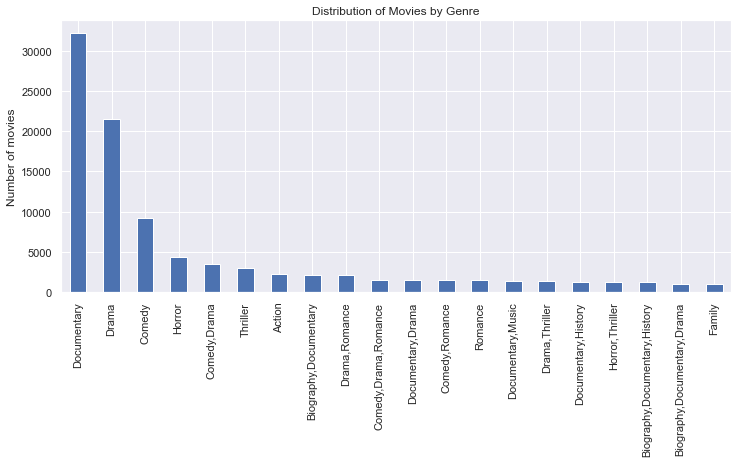

In [54]:
ax = basic['genres'].value_counts()[:20].plot(figsize = (12,5), kind= 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# set the y-axis label
ax.set_ylabel("Number of movies")
# set the title
ax.set_title("Distribution of Movies by Genre");

The data indicates that Documentaries are the prevailing genre, followed by Dramas, and so forth. This insight can assist the movie studio in determining the genres they might prioritize. Furthermore, examining the runtime_minutes column in movie_basics could offer guidance on the ideal duration for the studio's films.

Let us get some descriptive statistics from the columns

In [55]:
print(basic['runtime_minutes'].describe())
print('The median value of the column is: ' + str(basic['runtime_minutes'].median()))
print('The mode value of the column is: ' + str(basic['runtime_minutes'].mode()[0]))
print('The range of the column is: ' + str(basic['runtime_minutes'].max() - basic['runtime_minutes'].min()))

count    112232.000000
mean         86.261556
std         167.896646
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64
The median value of the column is: 87.0
The mode value of the column is: 90.0
The range of the column is: 51419.0


It is evident from the data that there is a symmetrical distribution. The majority of movies in the dataset have an average length of 86 minutes. Additionally, the standard deviation reveals that the data deviates considerably from this mean, suggesting a likelihood of outliers. This implies that there are a significant number of movies exceeding the 86-minute mark in length.

Number of outliers in runtime_minutes: 6725


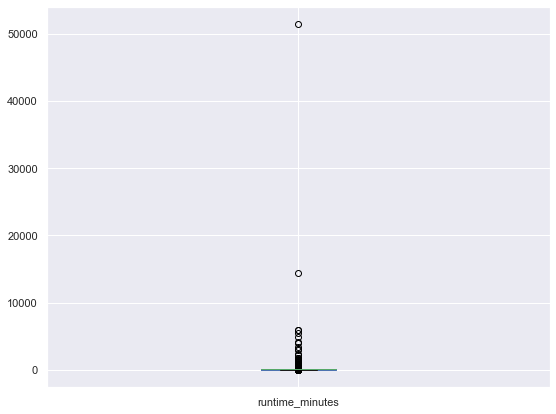

In [56]:
# Check for ourliers using a barplot

basic['runtime_minutes'].plot.box(figsize=(9,7))


# Find the number of outliers

tf = basic['runtime_minutes'].quantile(.25)
sf = basic['runtime_minutes'].quantile(.75)
IQR = sf - tf 
outliers = basic[(basic.runtime_minutes < tf - 1.5* IQR)  |
                    (basic.runtime_minutes > sf + 1.5 * IQR) ]
print('Number of outliers in runtime_minutes: ' + str(outliers.runtime_minutes.count()))


The presence of numerous outliers is evident, and removing them would significantly disrupt the graph's distribution. Therefore, it is more sensible to retain them.

Moving forward, we examine the columns in the B.O.M dataset that indicate the total gross earnings of movies, both domestically and internationally.

In [58]:
# Analyzing the descriptive statistics of the domestic_gross column
print('Descriptive stats for domestic_gross:\n' + str(bom['domestic_gross'].describe()))
print('Median value: ' + str(bom['domestic_gross'].median()))
print('Mode value: ' + str(bom['domestic_gross'].mode()[0]))
print('Range: ' + str(bom['domestic_gross'].max() - bom['domestic_gross'].min()) + '\n')

# Analyzing the descriptive statistics of the foreign_gross column
print('Descriptive stats for foreign_gross:\n' + str(bom['foreign_gross'].describe()))
print('Median value: ' + str(bom['foreign_gross'].median()))
print('Mode value: ' + str(bom['foreign_gross'].mode()[0]))
print('Range: ' + str(bom['foreign_gross'].max() - bom['foreign_gross'].min()))

Descriptive stats for domestic_gross:
count    3.356000e+03
mean     2.877149e+07
std      6.700694e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.795000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64
Median value: 1400000.0
Mode value: 1100000.0
Range: 936699900.0

Descriptive stats for foreign_gross:
count    2.033000e+03
mean     7.495490e+07
std      1.375145e+08
min      6.000000e+02
25%      3.700000e+06
50%      1.870000e+07
75%      7.490000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64
Median value: 18700000.0
Mode value: 1200000.0
Range: 960499400.0


Generate histograms to examine the distribution skewness of both 'domestic_gross' and 'foreign_gross' columns, using 20 bins for visualization.

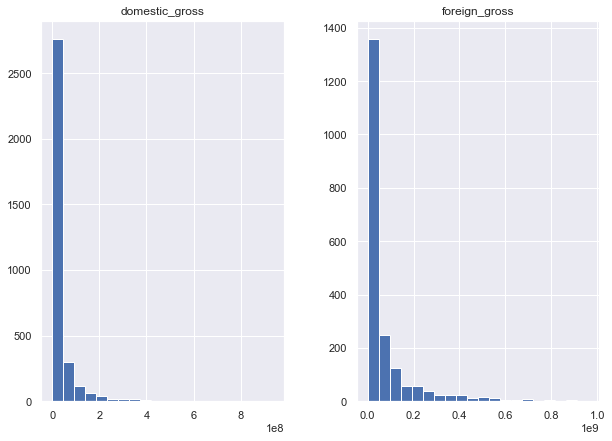

In [59]:
bom.hist(figsize= (10,7), column= ['domestic_gross','foreign_gross'], bins=20);


The illustration above shows descriptive statistics for the 'domestic_gross' column, encompassing measures such as the mean, 25th percentile, and maximum values. A notably high standard deviation suggests significant dispersion from the mean. The accompanying histogram reveals a right-skewed distribution, indicating that the prevalent domestic gross amounts fall below the average.

Similarly, for the 'foreign_gross' column, descriptive statistics are presented, with a low standard deviation indicating minimal spread. The histogram also portrays a right-skewed distribution, suggesting that the predominant foreign gross amounts are below the average.

Additionally, the columns within the 'movie_ratings' table can undergo similar analysis.

In [60]:

# Display descriptive statistics for the 'averagerating' column
print("Descriptive statistics for the 'averagerating' column:")
print(rate['averagerating'].describe())

# Display the median value of the 'averagerating' column
print("The median value of the 'averagerating' column is: " + str(rate['averagerating'].median()))

# Display the mode value of the 'averagerating' column
print("The mode value of the 'averagerating' column is: " + str(rate['averagerating'].mode()[0]))

# Display the range of values in the 'averagerating' column
print("The range of values in the 'averagerating' column is: " + str(rate['averagerating'].max() - rate['averagerating'].min()) + '\n')

# Display descriptive statistics for the 'numvotes' column
print("Descriptive statistics for the 'numvotes' column:")
print(rate['numvotes'].describe())

# Display the median value of the 'numvotes' column
print("The median value of the 'numvotes' column is: " + str(rate['numvotes'].median()))

# Display the mode value of the 'numvotes' column
print("The mode value of the 'numvotes' column is: " + str(rate['numvotes'].mode()[0]))

# Display the range of values in the 'numvotes' column
print("The range of values in the 'numvotes' column is: " + str(rate['numvotes'].max() - rate['numvotes'].min()) + '\n')

Descriptive statistics for the 'averagerating' column:
count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64
The median value of the 'averagerating' column is: 6.5
The mode value of the 'averagerating' column is: 7.0
The range of values in the 'averagerating' column is: 9.0

Descriptive statistics for the 'numvotes' column:
count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64
The median value of the 'numvotes' column is: 49.0
The mode value of the 'numvotes' column is: 6
The range of values in the 'numvotes' column is: 1841061



Let's check for outliers

In [61]:
Q1 = rate['averagerating'].quantile(.25)
Q3 = rate['averagerating'].quantile(.75)
IQR = Q3 - Q1 
outliers = rate[(rate['averagerating'] < Q1 - 1.5* IQR)  |
                    (rate['averagerating'] > Q3 + 1.5 * IQR) ]
print('Number of outliers in averagerating: ' + str(outliers.averagerating.count()))

Q_1 = rate['numvotes'].quantile(.25)
Q_3 = rate['numvotes'].quantile(.75)
IQR_ = Q_3 - Q_1
outliers = rate[(rate['numvotes'] < Q_1 - 1.5* IQR_)  |
                    (rate['numvotes'] > Q_3 + 1.5 * IQR_) ]
print('Number of outliers in numvotes: ' + str(outliers.numvotes.count()));

Number of outliers in averagerating: 1172
Number of outliers in numvotes: 11758


In [ ]:
# We can have a better perspective on the outliers using a box plot

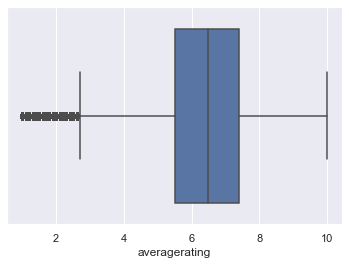

In [63]:
sns.boxplot(x = rate['averagerating']);

###### Remove the outliers

In [65]:
lower = Q1 - 1.5* IQR
upper = Q3 + 1.5 * IQR
rate= rate[(rate['averagerating'] > lower) & (rate['averagerating'] < upper)]

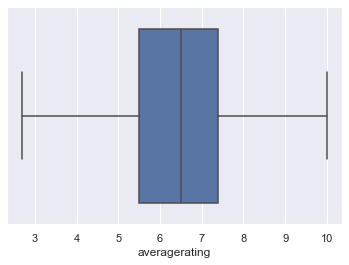

In [66]:
# Confirm that the outliers have been removed

sns.boxplot(x = rate['averagerating']);

In [67]:
# Analyzing new descriptive characteristics
print(f"For the averagerating column:\n{rate['averagerating'].describe()}")
print(f"The median value of the column is: {rate['averagerating'].median()}")
print(f"The mode value of the column is: {rate['averagerating'].mode()[0]}")
print(f"The range of the column is: {rate['averagerating'].max() - rate['averagerating'].min()}\n")

For the averagerating column:
count    72684.000000
mean         6.401956
std          1.380133
min          2.700000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64
The median value of the column is: 6.5
The mode value of the column is: 7.0
The range of the column is: 7.3



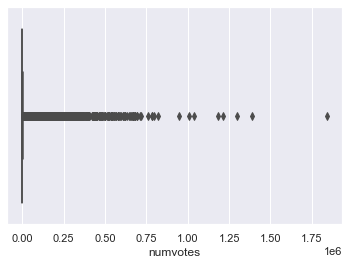

In [69]:
# Generate a box plot to identify potential outliers in the numvotes column
sns.boxplot(x=rate['numvotes']);

###### Distribution of the columns

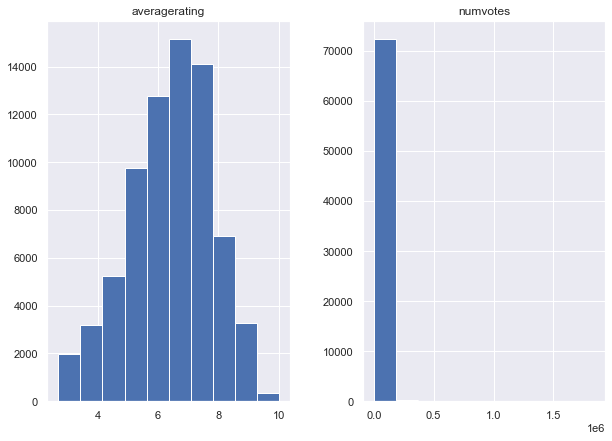

In [70]:
rate.hist(figsize= (10,7), column= ['averagerating','numvotes'], bins=10);

The above illustration reveals that the "averagerating" column displays a slightly skewed distribution, indicating that the majority of movies receive ratings close to 6.4. Regarding the "numvotes" column, it exhibits a right-skewed distribution, indicating that most movies receive a number of votes below the average. This phenomenon is attributed to the presence of outlier movies with exceptionally high numbers of votes.

# Section 5: Conclusion

# Section 6: Recommendations

# Section 7: Next Steps